In [20]:
from pathlib import Path

import librosa
import numpy as np
import pandas as pd
import tqdm


def slice_cens(x, k=50):
    # return 5 second slices that are reshaped appropriately
    indexes = np.array(
        [
            np.arange(i, i + k)
            for i in range(0, x.shape[1], k)
            if i + k < x.shape[1]
        ]
    )
    return np.transpose(x[:, indexes], [1, 0, 2])


def extract_dataframe(model, site, audio_id, base="../data/input/train_soundscapes"):
    path = list(Path(base).glob(f"{audio_id}_{site}_*.ogg"))
    if not path:
        raise ValueError("audio not found")
    cens = extract_features(path[0])
    feature = predict_layer(model, cens)
    feature_df = pd.DataFrame(feature)
    metadata_df = pd.DataFrame((feature_df.index + 1) * 5, columns=["seconds"])
    metadata_df["site"] = site
    metadata_df["audio_id"] = audio_id
    return metadata_df.join(feature_df)

In [32]:
input_df = pd.read_csv("../data/input/train_soundscape_labels.csv")
input_df

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall
...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall
2396,54955_SSW_585,SSW,54955,585,grycat
2397,54955_SSW_590,SSW,54955,590,grycat
2398,54955_SSW_595,SSW,54955,595,nocall


In [60]:
cens_df = pd.read_pickle("../data/cens/train_soundscapes/data.pkl.gz")
cens_df

,name,parent,data,sample_rate,seconds,cens,cens_sample_rate,path
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,600.0,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...
1,11254_COR_20190904,train_soundscapes,"[-0.03685273, 0.0034371414, 0.0536922, -0.0079...",22050,600.0,"[[0.3344339429355312, 0.33248408648886996, 0.3...",10,data/input/train_soundscapes/11254_COR_2019090...
2,14473_SSW_20170701,train_soundscapes,"[0.00047344487, 0.0012023906, -0.0017922, -4.6...",22050,600.0,"[[0.148086790140989, 0.14555407333459783, 0.14...",10,data/input/train_soundscapes/14473_SSW_2017070...
3,18003_COR_20190904,train_soundscapes,"[0.033321597, 0.04495884, 0.04248728, 0.051341...",22050,600.0,"[[0.31676360666098224, 0.31754166953090435, 0....",10,data/input/train_soundscapes/18003_COR_2019090...
4,20152_SSW_20170805,train_soundscapes,"[0.10134773, 0.14713703, 0.13197538, 0.1344521...",22050,600.0,"[[0.2186177740319302, 0.22069793302088028, 0.2...",10,data/input/train_soundscapes/20152_SSW_2017080...
5,21767_COR_20190904,train_soundscapes,"[0.032651156, 0.05079725, 0.030774817, 0.04686...",22050,600.0,"[[0.4352878059107777, 0.43520496504463246, 0.4...",10,data/input/train_soundscapes/21767_COR_2019090...
6,26709_SSW_20170701,train_soundscapes,"[-0.078987055, -0.13539001, -0.114788085, -0.1...",22050,600.0,"[[0.25850043089545305, 0.2582876301862019, 0.2...",10,data/input/train_soundscapes/26709_SSW_2017070...
7,26746_COR_20191004,train_soundscapes,"[0.010165007, -0.003903959, -0.027708258, -0.0...",22050,600.0,"[[0.4135042008873219, 0.40391112217119207, 0.3...",10,data/input/train_soundscapes/26746_COR_2019100...
8,2782_SSW_20170701,train_soundscapes,"[-0.0026152704, -0.0027552508, -0.008998284, -...",22050,600.0,"[[0.32891244746480597, 0.3298680390857612, 0.3...",10,data/input/train_soundscapes/2782_SSW_20170701...
9,28933_SSW_20170408,train_soundscapes,"[0.012256168, 0.02170331, 0.023253325, 0.02823...",22050,600.0,"[[0.14421329424193294, 0.14710374068907045, 0....",10,data/input/train_soundscapes/28933_SSW_2017040...


In [61]:
cens_df.shape

(20, 8)

In [23]:
first = cens_df.cens.iloc[0]
first.shape

(12, 6080)

In [24]:
slice_cens(first).shape

(121, 12, 50)

In [28]:
list(slice_cens(first))[0].shape

(12, 50)

In [63]:
def with_metadata(row):
    res = list(row)
    n = len(res)
    k = [(i+1)*5 for i in range(n)]
    return list(zip(k, res))

def explode_cens(df):
    df["_section"] = df.cens.apply(slice_cens).apply(with_metadata)
    df = df.explode("_section")
    df["seconds"] = df["_section"].apply(lambda x: x[0])
    df["snippet"] = df["_section"].apply(lambda x: x[1])
    return df.drop(columns=["_section"])

explode_cens(cens_df)

,name,parent,data,sample_rate,seconds,cens,cens_sample_rate,path,snippet
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,5,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...,"[[0.2593536261802261, 0.2612607326209118, 0.26..."
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,10,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...,"[[0.23003151804907418, 0.228859458750747, 0.22..."
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,15,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...,"[[0.28287942807254557, 0.28535505345692674, 0...."
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,20,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...,"[[0.21678747892870176, 0.21819774110088674, 0...."
0,10534_SSW_20170429,train_soundscapes,"[-0.07781942, -0.106421225, -0.09363813, -0.10...",22050,25,"[[0.2593536261802261, 0.2612607326209118, 0.26...",10,data/input/train_soundscapes/10534_SSW_2017042...,"[[0.2654773664386965, 0.26561438847826596, 0.2..."
...,...,...,...,...,...,...,...,...,...
19,7954_COR_20190923,train_soundscapes,"[-0.014167398, 0.010762382, 0.013436647, -0.05...",22050,585,"[[0.2727147222865413, 0.2721443336417846, 0.27...",10,data/input/train_soundscapes/7954_COR_20190923...,"[[0.2769851006362645, 0.27687627657578007, 0.2..."
19,7954_COR_20190923,train_soundscapes,"[-0.014167398, 0.010762382, 0.013436647, -0.05...",22050,590,"[[0.2727147222865413, 0.2721443336417846, 0.27...",10,data/input/train_soundscapes/7954_COR_20190923...,"[[0.2590660262314641, 0.25919156313121544, 0.2..."
19,7954_COR_20190923,train_soundscapes,"[-0.014167398, 0.010762382, 0.013436647, -0.05...",22050,595,"[[0.2727147222865413, 0.2721443336417846, 0.27...",10,data/input/train_soundscapes/7954_COR_20190923...,"[[0.28863671210033476, 0.28956537639989066, 0...."
19,7954_COR_20190923,train_soundscapes,"[-0.014167398, 0.010762382, 0.013436647, -0.05...",22050,600,"[[0.2727147222865413, 0.2721443336417846, 0.27...",10,data/input/train_soundscapes/7954_COR_20190923...,"[[0.3458002793947462, 0.34650520699877113, 0.3..."


In [78]:
input_df.row_id.unique()

array(['7019_COR_5', '7019_COR_10', '7019_COR_15', ..., '54955_SSW_590',
       '54955_SSW_595', '54955_SSW_600'], dtype=object)

In [76]:
snip_df.row_id.unique()

array(['10534_SSW_20170429', '11254_COR_20190904', '14473_SSW_20170701',
       '18003_COR_20190904', '20152_SSW_20170805', '21767_COR_20190904',
       '26709_SSW_20170701', '26746_COR_20191004', '2782_SSW_20170701',
       '28933_SSW_20170408', '31928_COR_20191004', '42907_SSW_20170708',
       '44957_COR_20190923', '50878_COR_20191004', '51010_SSW_20170513',
       '54955_SSW_20170617', '57610_COR_20190904', '7019_COR_20190904',
       '7843_SSW_20170325', '7954_COR_20190923'], dtype=object)

In [79]:
input_df

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall
...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall
2396,54955_SSW_585,SSW,54955,585,grycat
2397,54955_SSW_590,SSW,54955,590,grycat
2398,54955_SSW_595,SSW,54955,595,nocall


In [84]:
snip_df = explode_cens(cens_df)
snip_df["site"] = snip_df.name.apply(lambda x: x.split("_")[1])
snip_df["audio_id"] = snip_df.name.apply(lambda x: x.split("_")[0]).astype("int")
snip_df.head()
train_df = input_df.merge(snip_df, on=["site", "audio_id", "seconds"])
train_df

,row_id,site,audio_id,seconds,birds,name,parent,data,sample_rate,cens,cens_sample_rate,path,snippet
0,7019_COR_5,COR,7019,5,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"[[0.29982088833602566, 0.2964565244514178, 0.2..."
1,7019_COR_10,COR,7019,10,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"[[0.2679025585163842, 0.2687655506794904, 0.26..."
2,7019_COR_15,COR,7019,15,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"[[0.32643550393721743, 0.3266425777863559, 0.3..."
3,7019_COR_20,COR,7019,20,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"[[0.3683650825248329, 0.3651103126404559, 0.36..."
4,7019_COR_25,COR,7019,25,nocall,7019_COR_20190904,train_soundscapes,"[-0.074927814, -0.070623636, -0.012813405, -0....",22050,"[[0.29982088833602566, 0.2964565244514178, 0.2...",10,data/input/train_soundscapes/7019_COR_20190904...,"[[0.2596357369955587, 0.26199671821920606, 0.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"[[0.33299807090836353, 0.3286480993141731, 0.3..."
2396,54955_SSW_585,SSW,54955,585,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"[[0.4553848137153648, 0.45575775925349077, 0.4..."
2397,54955_SSW_590,SSW,54955,590,grycat,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"[[0.5295391487749542, 0.5328746894329294, 0.53..."
2398,54955_SSW_595,SSW,54955,595,nocall,54955_SSW_20170617,train_soundscapes,"[0.11415207, 0.15958197, 0.122738324, 0.121970...",22050,"[[0.22879103798263076, 0.22964307854049798, 0....",10,data/input/train_soundscapes/54955_SSW_2017061...,"[[0.4109905307472948, 0.4017029719188194, 0.39..."


In [88]:
np.stack(train_df.snippet.values).shape

(2400, 12, 50)

In [97]:
from simple_mp.simple import simple_fast

train_df.snippet.iloc[:25].apply(lambda x: simple_fast(x, x, 10)[0])

0     [0.025750517699915543, 0.03524351299598505, 0....
1     [0.02124369734742365, 0.03199962127912265, 0.0...
2     [0.008673126902805361, 0.01074550823217768, 0....
3     [0.032847748267953114, 0.04386123465121239, 0....
4     [0.013054479131284102, 0.021068742764369874, 0...
5     [0.023633032772597096, 0.031530161086550546, 0...
6     [0.02341999112794957, 0.03154620426214938, 0.0...
7     [0.010644959821988376, 0.0159064427666753, 0.0...
8     [0.010564222496037834, 0.013369422416937227, 0...
9     [0.02054281287860038, 0.03198931879167333, 0.0...
10    [0.027220517088329288, 0.03707551484547489, 0....
11    [0.03165916376301184, 0.054506882442970056, 0....
12    [0.021868422278548072, 0.029543123049117936, 0...
13    [0.026010881818913922, 0.03275745905021071, 0....
14    [0.03935034884849942, 0.05306346356676617, 0.0...
15    [0.02309582806484778, 0.03499894300236006, 0.0...
16    [0.03817607388362687, 0.05431360550050218, 0.0...
17    [0.008857200615276395, 0.01301954532183857

In [98]:
train_df["simple"] = train_df.snippet.apply(lambda x: simple_fast(x, x, 10)[0])

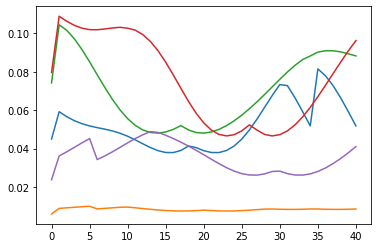

In [104]:
import matplotlib.pyplot as plt

for x in train_df.simple.sample(5):
    plt.plot(x)

In [117]:
# take the first non-bird sample from each one
sample_df = train_df[(train_df.birds == "nocall")].groupby("site").first()

In [124]:
sample_df.snippet

site
COR    [[0.29982088833602566, 0.2964565244514178, 0.2...
SSW    [[0.10080914438139554, 0.10497310432642959, 0....
Name: snippet, dtype: object

In [165]:
s0 = sample_df.snippet.iloc[0]
s1 = sample_df.snippet.iloc[1]

train_df["s0"] = train_df.snippet.apply(lambda x: simple_fast(s0, x, 25)[0])
train_df["s1"] = train_df.snippet.apply(lambda x: simple_fast(s1, x, 25)[0])
train_df["ss"] = train_df.snippet.apply(lambda x: simple_fast(x, x, 25)[0])

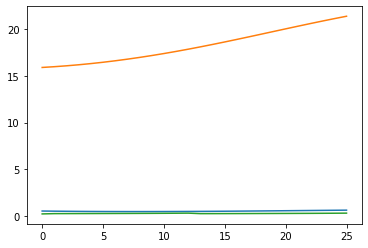

In [166]:
for row in train_df[(train_df.birds != "nocall")].sample(1).itertuples():
    plt.plot(row.s0)
    plt.plot(row.s1)
    plt.plot(row.ss)
    plt.show()

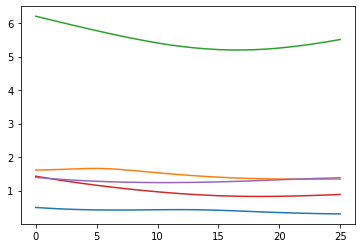

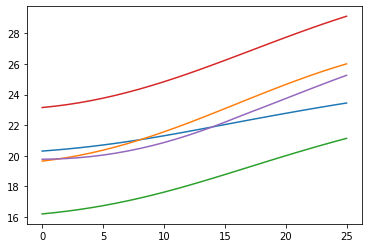

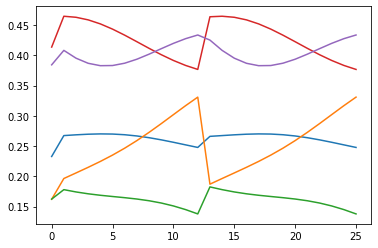

In [167]:
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.s0)
plt.show()
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.s1)
plt.show()
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.ss)
plt.show()

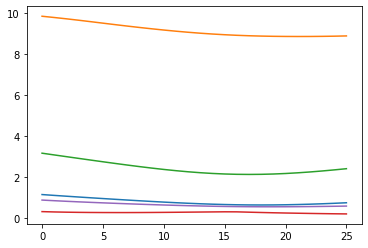

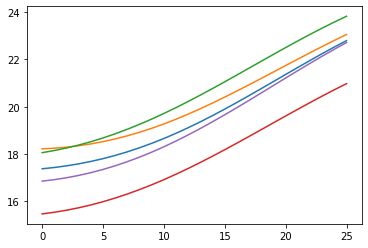

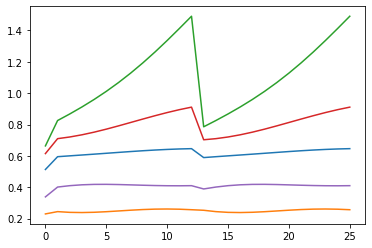

In [168]:
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.s0)
plt.show()
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.s1)
plt.show()
for row in train_df[(train_df.birds != "nocall")].sample(5).itertuples():
    plt.plot(row.ss)
plt.show()

In [174]:
np.hstack([
    np.stack(train_df.s0.values),
    np.stack(train_df.s1.values),
    np.stack(train_df.ss.values)
]).shape

(2400, 78)

In [181]:
train_df.apply(lambda r: [
    r.s0.min(), r.s1.min(), r.ss.min(),
    np.median(r.s0), np.median(r.s1), np.median(r.ss),
    r.s0.max(), r.s1.max(), r.ss.max()
], axis=1)

0       [0.2326142412801815, 17.75937487217555, 0.2326...
1       [0.25334339486448876, 16.73796564079248, 0.139...
2       [0.562983987752302, 17.654600986866285, 0.1199...
3       [0.3835988623056432, 18.008446668403977, 0.278...
4       [0.3999342377283879, 18.270365985704228, 0.192...
                              ...                        
2395    [2.14736899807816, 16.54908925399424, 0.955756...
2396    [2.697523583500729, 15.335648167965385, 0.4546...
2397    [2.984983220019189, 16.341392576837954, 0.7017...
2398    [2.8006545551104307, 21.70017350569727, 0.7290...
2399    [1.1371475995757032, 20.424499967462154, 0.370...
Length: 2400, dtype: object

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = (train_df.birds == "nocall").astype(np.uint8)

# concat of simple features 0.636
# X = np.hstack([
#     np.stack(train_df.s0.values),
#     np.stack(train_df.s1.values),
#     np.stack(train_df.ss.values)
# ])
X = np.stack(train_df.snippet).reshape(y.shape[0], -1)

# simple summary features, 0.65 on logistic
# X = np.stack(train_df.apply(lambda r: [
#     r.s0.min(), r.s1.min(), r.ss.min(),
#     np.median(r.s0), np.median(r.s1), np.median(r.ss),
#     r.s0.max(), r.s1.max(), r.ss.max()
# ], axis=1).values)

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression(max_iter=500).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6483333333333333

In [207]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6716666666666666

In [208]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6533333333333333